<a href="https://colab.research.google.com/github/simanfathima/ML-Simple-Tasks/blob/master/StudentScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Student scores using Linear and Polynomial Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!wget https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

--2020-08-15 08:15:59--  https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212 [text/plain]
Saving to: ‘student_scores - student_scores.csv’

student_scores - st 100%[===================>]     212  --.-KB/s    in 0s      

2020-08-15 08:15:59 (7.45 MB/s) - ‘student_scores - student_scores.csv’ saved [212/212]



## Importing the dataset

In [3]:
dataset = pd.read_csv('student_scores - student_scores.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [4]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Polynomial Regression model on the Training set

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Linear Regression model on the Training set

In [7]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results and comparing with original data
> **Linear Regression**


In [8]:
lin_pred =lin_regressor.predict(X_test)
print(np.concatenate((lin_pred.reshape(len(lin_pred),1), y_test.reshape(len(y_test),1)),1))

[[17.04289179 20.        ]
 [33.51695377 27.        ]
 [74.21757747 69.        ]
 [26.73351648 30.        ]
 [59.68164043 62.        ]
 [39.33132858 35.        ]
 [20.91914167 24.        ]
 [78.09382734 86.        ]
 [69.37226512 76.        ]]




> **Polynomial Regression**


In [9]:
poly_pred = poly_regressor.predict(poly_reg.transform(X_test))
print(np.concatenate((poly_pred.reshape(len(poly_pred),1), y_test.reshape(len(y_test),1)),1))

[[18.18953797 20.        ]
 [31.52451109 27.        ]
 [76.86944121 69.        ]
 [24.77992602 30.        ]
 [62.35729611 62.        ]
 [38.12509618 35.        ]
 [20.28578303 24.        ]
 [80.05388941 86.        ]
 [72.46248442 76.        ]]


## Evaluating the Model Performance
> **Linear Regression**

In [10]:
from sklearn.metrics import r2_score
print("Accuracy rate:",r2_score(y_test, lin_pred))

Accuracy rate: 0.9555700801388128


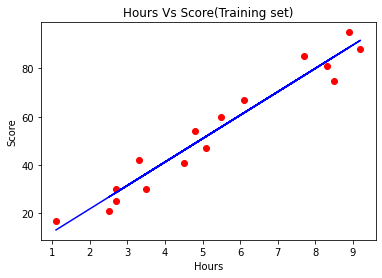

In [11]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_regressor.predict(X_train), color = 'blue')
plt.title('Hours Vs Score(Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

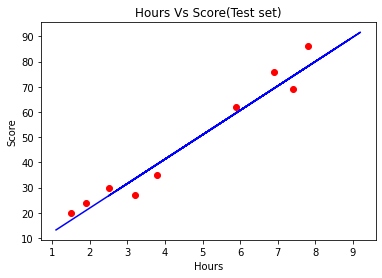

In [12]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lin_regressor.predict(X_train), color = 'blue')
plt.title('Hours Vs Score(Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

> **Polynomial Regression**

In [13]:
from sklearn.metrics import r2_score
print("Accuracy rate:",r2_score(y_test, poly_pred))

Accuracy rate: 0.9642330762709628


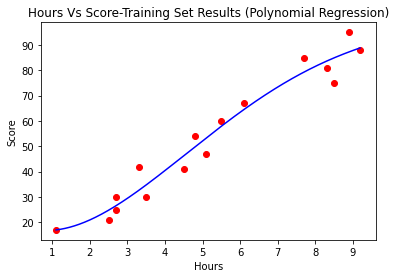

In [14]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, poly_regressor.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Hours Vs Score-Training Set Results (Polynomial Regression)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

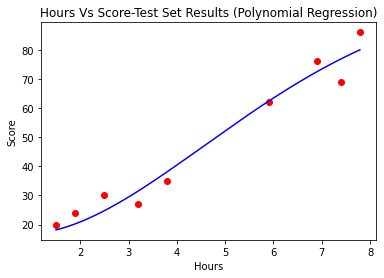

In [15]:
X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, poly_regressor.predict(poly_reg.transform(X_grid)), color = 'blue')
plt.title('Hours Vs Score-Test Set Results (Polynomial Regression)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

## Example predictions
> **Linear Regression**

In [16]:
print("Student Score for %3.2f hours is %4.2f" %(9.0,np.squeeze(lin_regressor.predict(([[9.0]])))))
print("Student Score for %3.2f hours is %4.2f" %(2.0,np.squeeze(lin_regressor.predict(([[2.0]])))))
print("Student Score for %3.2f hours is %4.2f" %(7.9,np.squeeze(lin_regressor.predict(([[7.9]])))))
print("Student Score for %3.2f hours is %4.2f" %(5.3,np.squeeze(lin_regressor.predict(([[5.3]])))))

Student Score for 9.00 hours is 89.72
Student Score for 2.00 hours is 21.89
Student Score for 7.90 hours is 79.06
Student Score for 5.30 hours is 53.87


> **Polynomial Regression**

In [17]:
print("Student Score for %3.2f hours is %4.2f" %(9.0,np.squeeze(poly_regressor.predict(poly_reg.transform([[9.0]])))))
print("Student Score for %3.2f hours is %4.2f" %(2.0,np.squeeze(poly_regressor.predict(poly_reg.transform([[2.0]])))))
print("Student Score for %3.2f hours is %4.2f" %(7.9,np.squeeze(poly_regressor.predict(poly_reg.transform([[7.9]])))))
print("Student Score for %3.2f hours is %4.2f" %(5.3,np.squeeze(poly_regressor.predict(poly_reg.transform([[5.3]])))))

Student Score for 9.00 hours is 87.81
Student Score for 2.00 hours is 20.93
Student Score for 7.90 hours is 80.80
Student Score for 5.30 hours is 55.64


## Comparing Linear and Polynomial Regression Models

In [18]:
linear_performance=r2_score(y_test, lin_pred)
poly_performance=r2_score(y_test, poly_pred)

if linear_performance > poly_performance :
  print("Linear Regression is the best of the two model with an Accuracy rate of:",linear_performance*100)
else:
  print("Polynomial Regression is the best of the two model with an Accuracy rate of:",poly_performance*100) 

Polynomial Regression is the best of the two model with an Accuracy rate of: 96.42330762709628
